In [164]:
# Получить последние новости
import feedparser
from pprint import pprint

# SOURCES = {
#     # Habr
#     # 'habr': 'https://habr.com/ru/rss/all/all/?fl=ru',

#     # Rubase
#     ## By companies
#     # 'rb_chance': "https://rb.ru/feeds/tag/chance/",
#     # 'rb_vk': "https://rb.ru/feeds/tag/vk/",
#     'rb_rvc': "https://rb.ru/feeds/tag/rvc/",
#     # 'rb_yandex': "https://rb.ru/feeds/tag/yandex/",
#     'rb_skolkovo': "https://rb.ru/feeds/tag/skolkovo/",
#     # 'rb_facebook': "https://rb.ru/feeds/tag/facebook/",
#     'rb_mailru': "https://rb.ru/feeds/tag/mailru/",
#     # 'rb_microsoft': "https://rb.ru/feeds/tag/microsoft/",

#     ## By topics
#     'rb_advertising': "https://rb.ru/feeds/tag/advertising/",
#     # 'rb_robotics': "https://rb.ru/feeds/tag/robotics/",
#     # 'rb_it': "https://rb.ru/feeds/tag/it/",
#     # 'rb_bigdata': "https://rb.ru/feeds/tag/bigdata/",
#     'rb_china': "https://rb.ru/feeds/tag/china/",
#     'rb_finance': "https://rb.ru/feeds/tag/fintech/",
#     # 'rb_cloud': "https://rb.ru/feeds/tag/cloud/",

#     # Vedomosti
#     # 'vd_business': "https://www.vedomosti.ru/rss/rubric/business",
#     # 'vd_it_business': "https://www.vedomosti.ru/rss/rubric/it_business",
#     # 'vd_finance': "https://www.vedomosti.ru/rss/rubric/finance",
#     # 'vd_opinion': "https://www.vedomosti.ru/rss/rubric/opinion",
#     # 'vd_analytics': "https://www.vedomosti.ru/rss/rubric/opinion/analytics",


#     # RT
#     # 'rt': "https://russian.rt.com/rss/",
# }


SOURCES = {
    # "rt": "https://russian.rt.com/rss",
    "vd": "https://www.vedomosti.ru/rss/news",

    # for buhgalter
    "buh": "https://buh.ru/rss/?chanel=news",
    "klerk": "https://www.klerk.ru/export/news.rss",
    "audit-it": "http://www.audit-it.ru/rss/news_all.xml",
    # "rb": "https://rb.ru/feeds/all/",

    # for business owner
    # "rb": "https://rb.ru/feeds/all/",
    "rb_pr": "https://rb.ru/feeds/tag/pr/",
    "rb_finance": "https://rb.ru/feeds/tag/fintech/",
    "rb_hr": "https://rb.ru/feeds/tag/hr/",
    "rb_crypto": "https://rb.ru/feeds/tag/crypto/",
    "rb_marketing": "https://rb.ru/feeds/tag/marketing/",
    "rmblr_finance": "https://finance.rambler.ru/rss/economics/",
    "rmblr_business": "https://finance.rambler.ru/rss/business/",
    "rmblr_markets": "https://finance.rambler.ru/rss/markets/",
}

rb_topics = {
    "rb_pr":"PR",
    "rb_finance":"Финансы",
    "rb_hr":"HR",
    "rb_crypto":"Криптовалюты",
    "rb_marketing":"Маркетинг",
}

class RSSParser:
    def __init__(self, sources: dict[str,str]):
        self.sources = sources

    def fetch_entries(self) -> list[dict]:
        entries = []
        for source, url in self.sources.items():
            feed = feedparser.parse(url)
            # If there is no tags for entries, skip source and print warning
            if not feed['entries'][0].get('tags') and source not in rb_topics:
                print(f"Warning: No tags for source {source}")
                continue

            for entry in feed['entries']:
                entry['source'] = source
                entries.append(entry)
        return entries

    def standardize_general(self, entry: dict) -> dict:
        """ Turns entry to a standardized format

        Args:
            entry (dict): entry from feedparser

        Returns:
            dict: standardized entry in a format:
        {
            'source': str,
            'title': str,
            'url':  str,
            'date': timestamp with zone,
            'tags': list[str],
            'text': str,
        }
        """
        entry =  {
            'source': entry['source'],
            'title': entry['title'].replace('\n', ' ').replace('\r', ' ').replace('\t', ' ').replace('\xa0', ' ').strip(),
            'url':  entry['link'],
            'date': entry['published_parsed'],
            'tags': [tag['term'] for tag in entry['tags']] if 'tags' in entry else [rb_topics[entry['source']]] if entry['source'] in rb_topics else [],
            'text': entry['summary'].replace('\xa0', ' ') if 'summary' in entry else '',
        }
        # pprint(entry)

        return entry

    def get_last_standardized_news(self) -> list[dict]:
        entries = self.fetch_entries()
        return [self.standardize_general(entry) for entry in entries]



parser = RSSParser(SOURCES)
news = parser.get_last_standardized_news()
news = sorted(news, key=lambda x: x['date'], reverse=True)
pprint(news[-3:])


[{'date': time.struct_time(tm_year=2021, tm_mon=12, tm_mday=29, tm_hour=13, tm_min=33, tm_sec=0, tm_wday=2, tm_yday=363, tm_isdst=0),
  'source': 'rb_pr',
  'tags': ['PR'],
  'text': 'Расширение инфополя, глобальный кризис, усиление роли HR, смена '
          'повестки, перестановки на рынке новых медиа и классических СМИ, '
          'тотальный уход в онлайн — все это оказало огромное влияние на рынок '
          'коммуникаций в 2021 году и продолжит менять его в 2022. Александр '
          'Изряднов, сооснователь агентства Vinci PR, рассказывает о ключевых '
          'трендах пиара на будущий год.',
  'title': 'Топ-5 трендов в пиаре на 2022 год: слияние с маркетингом, '
           'сопротивление онлайну и другое',
  'url': 'https://rb.ru/opinion/5-trends-pr-2022/'},
 {'date': time.struct_time(tm_year=2021, tm_mon=12, tm_mday=29, tm_hour=1, tm_min=0, tm_sec=0, tm_wday=2, tm_yday=363, tm_isdst=0),
  'source': 'rb_pr',
  'tags': ['PR'],
  'text': 'Судьба CEO когда-то успешного ювелирно

In [165]:
import pandas as pd
from pandarallel import pandarallel as pdpl
import time
pdpl.initialize(progress_bar=True)

df = pd.DataFrame(news)
df.head()

# concat tags
df['tags'] = df['tags'].apply(lambda x: ', '.join(x))

# convert from time.struct_time to datetime
df['date'] = df['date'].apply(lambda x: time.strftime("%Y-%m-%d %H:%M:%S", x))
df['date'] = pd.to_datetime(df['date'])

df.head()

INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


,source,title,url,date,tags,text
0,rmblr_finance,Раскрыты условия падения рубля,https://finance.rambler.ru/economics/49481215-...,2022-10-09 00:07:03,Экономика,Ведущий аналитик отдела глобальных исследовани...
1,rmblr_markets,В Крыму не зафиксировали массового серьезного ...,https://finance.rambler.ru/markets/49482014-v-...,2022-10-08 20:35:24,Рынки,Большого количества случаев сильного завышения...
2,rmblr_finance,ВВП Украины за девять месяцев сократился почти...,https://finance.rambler.ru/economics/49481767-...,2022-10-08 19:36:00,Экономика,Внутренний валовой продукт (ВВП) Украины за де...
3,rmblr_markets,Bloomberg: Санкции против горнорудной промышле...,https://finance.rambler.ru/markets/49481291-bl...,2022-10-08 18:35:46,Рынки,Потенциальные санкции Лондонской биржи металло...
4,rb_marketing,Чужая интеллектуальная собственность: что можн...,https://rb.ru/opinion/copyright-in-ads/,2022-10-08 16:32:00,Маркетинг,"Что такое реклама, как она охраняется и какие ..."


In [166]:
# Import NER model
# coding: utf-8

from navec import Navec
from slovnet import NER
from natasha import (
    Segmenter,
    MorphVocab,

    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,

    PER,
    NamesExtractor,

    Doc
)

class NERParser:
    def __init__(self, navec_weights: str, ner_weights: str) -> None:
        self.navec = Navec.load(navec_weights)
        self.ner = NER.load(ner_weights)
        self.ner.navec(self.navec)
        self.emb = NewsEmbedding()
        self.morph_tagger = NewsMorphTagger(self.emb)
        self.segmenter = Segmenter()

    def get_ners_dict(self, text: str) -> dict:
        """ Returns a dictionary of named entities in a text
            Args:
                text (str): text to parse
                ner_model (slovnet.NER): ner model

            Returns:
                dict: dictionary of named entities in a text
            """
            # Use this function with pandarallel's parallel_apply
        markup = self.ner(text)
        ORGS, PERS, LOCS = [], [], []
        for span in markup.spans:
            span_text = markup.text[span.start:span.stop]
            {
                'ORG': ORGS,
                'PER': PERS,
                'LOC': LOCS,

            }[span.type].append(span_text)
            # print(span.type, span_text)
        # Получить существительные из текста
        doc = Doc(text)
        doc.segment(self.segmenter)
        doc.tag_morph(self.morph_tagger)
        nouns = [_.text for _ in doc.tokens if _.pos == 'NOUN']
        print(nouns)
        return {'ORGs': ORGS, 'PERs': PERS, 'LOCs': LOCS, 'NOUs': nouns}



ner = NERParser(
    r"S:\Workspace\MORETECH\nlp-workbench\models\navec_news_v1_1B_250K_300d_100q.tar",
    r"S:\Workspace\MORETECH\nlp-workbench\models\slovnet_ner_news_v1.tar",
)
# markup = ner.ner(text)
# print(show_markup(markup.text, markup.spans))



In [183]:
# Parse NERs
# from natasha import Doc
# df['ners'] = df['title'].apply(ner.get_ners_dict)

In [168]:
df.head()


,source,title,url,date,tags,text,ners
0,rmblr_finance,Раскрыты условия падения рубля,https://finance.rambler.ru/economics/49481215-...,2022-10-09 00:07:03,Экономика,Ведущий аналитик отдела глобальных исследовани...,"{'ORGs': [], 'PERs': [], 'LOCs': [], 'NOUs': [..."
1,rmblr_markets,В Крыму не зафиксировали массового серьезного ...,https://finance.rambler.ru/markets/49482014-v-...,2022-10-08 20:35:24,Рынки,Большого количества случаев сильного завышения...,"{'ORGs': [], 'PERs': [], 'LOCs': ['Крыму'], 'N..."
2,rmblr_finance,ВВП Украины за девять месяцев сократился почти...,https://finance.rambler.ru/economics/49481767-...,2022-10-08 19:36:00,Экономика,Внутренний валовой продукт (ВВП) Украины за де...,"{'ORGs': [], 'PERs': [], 'LOCs': ['Украины'], ..."
3,rmblr_markets,Bloomberg: Санкции против горнорудной промышле...,https://finance.rambler.ru/markets/49481291-bl...,2022-10-08 18:35:46,Рынки,Потенциальные санкции Лондонской биржи металло...,"{'ORGs': ['Bloomberg'], 'PERs': [], 'LOCs': ['..."
4,rb_marketing,Чужая интеллектуальная собственность: что можн...,https://rb.ru/opinion/copyright-in-ads/,2022-10-08 16:32:00,Маркетинг,"Что такое реклама, как она охраняется и какие ...","{'ORGs': [], 'PERs': [], 'LOCs': [], 'NOUs': [..."


In [169]:
%pip install natasha

Note: you may need to restart the kernel to use updated packages.


In [170]:
# %conda update -n base -c defaults conda
# %conda install -c conda-forge pymorphy2


In [171]:
# Russian lemmatisation example
# coding: utf-8

from navec import Navec
from slovnet import Morph
from natasha import (
    Segmenter,
    MorphVocab,

    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,

    PER,
    NamesExtractor,

    Doc
)

class Lemmatizer:
    def __init__(self) -> None:
        self.segmenter = Segmenter()
        self.morph_vocab = MorphVocab()
        self.emb = NewsEmbedding()
        self.morph_tagger = NewsMorphTagger(self.emb)


    def lemmatize(self, text: str) -> list[str]:
        """ Lemmatizes a text
        Args:
            text (str): text to lemmatize

        Returns:
            list[str]: list of lemmas
        """
        # Use this function with pandarallel's parallel_apply
        doc = Doc(text)
        doc.segment(self.segmenter)
        doc.tag_morph(self.morph_tagger)
        for token in doc.tokens:
            token.lemmatize(self.morph_vocab)
        return [_.lemma for _ in doc.tokens]


lemmatizer = Lemmatizer()

# lemmatize example
text = "В России с 1 июля введут новые правила для водителей"
lemmas = lemmatizer.lemmatize(text)
print(lemmas)




['в', 'россия', 'с', '1', 'июль', 'ввести', 'новый', 'правило', 'для', 'водитель']


In [172]:
df_backup = df.copy()
df_backup.head()
# df_backup['ners'].head(20).values

,source,title,url,date,tags,text,ners
0,rmblr_finance,Раскрыты условия падения рубля,https://finance.rambler.ru/economics/49481215-...,2022-10-09 00:07:03,Экономика,Ведущий аналитик отдела глобальных исследовани...,"{'ORGs': [], 'PERs': [], 'LOCs': [], 'NOUs': [..."
1,rmblr_markets,В Крыму не зафиксировали массового серьезного ...,https://finance.rambler.ru/markets/49482014-v-...,2022-10-08 20:35:24,Рынки,Большого количества случаев сильного завышения...,"{'ORGs': [], 'PERs': [], 'LOCs': ['Крыму'], 'N..."
2,rmblr_finance,ВВП Украины за девять месяцев сократился почти...,https://finance.rambler.ru/economics/49481767-...,2022-10-08 19:36:00,Экономика,Внутренний валовой продукт (ВВП) Украины за де...,"{'ORGs': [], 'PERs': [], 'LOCs': ['Украины'], ..."
3,rmblr_markets,Bloomberg: Санкции против горнорудной промышле...,https://finance.rambler.ru/markets/49481291-bl...,2022-10-08 18:35:46,Рынки,Потенциальные санкции Лондонской биржи металло...,"{'ORGs': ['Bloomberg'], 'PERs': [], 'LOCs': ['..."
4,rb_marketing,Чужая интеллектуальная собственность: что можн...,https://rb.ru/opinion/copyright-in-ads/,2022-10-08 16:32:00,Маркетинг,"Что такое реклама, как она охраняется и какие ...","{'ORGs': [], 'PERs': [], 'LOCs': [], 'NOUs': [..."


In [181]:
len(df_backup.value_counts('tags'))

45

In [182]:
# Count by tag:
# just filter by tag and count

In [175]:
df = df_backup.copy()

for ner_type in ['ORGs', 'PERs', 'LOCs', 'NOUs']:
    df[ner_type] = df['ners'].apply(lambda x: x[ner_type])

# lemmatize NERs
for ner_type in ['ORGs', 'PERs', 'LOCs', 'NOUs']:
    df[ner_type] = df[ner_type].apply(lambda x: [lemmatizer.lemmatize(_) for _ in x][0][0] if x else None)

ner_org_counts = df['ORGs'].explode().value_counts()
ner_loc_counts = df['LOCs'].explode().value_counts()
ner_per_counts = df['PERs'].explode().value_counts()
ner_nou_counts = df['NOUs'].explode().value_counts()



# Build plot
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    x=ner_org_counts.index,
    y=ner_org_counts.values,
    name='Организации',
    marker_color='rgb(55, 83, 109)'
))
fig.add_trace(go.Bar(
    x=ner_loc_counts.index,
    y=ner_loc_counts.values,
    name='Локации',
    marker_color='rgb(26, 118, 255)'
))
fig.add_trace(go.Bar(
    x=ner_per_counts.index,
    y=ner_per_counts.values,
    name='Люди',
    marker_color='rgb(26, 255, 255)'
))
fig.add_trace(go.Bar(
    x=ner_nou_counts.index,
    y=ner_nou_counts.values,
    name='Существительные',
    marker_color='rgb(26, 255, 26)'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

# prod

In [7]:
from navec import Navec
from slovnet import NER
from natasha import (
    Segmenter,
    MorphVocab,

    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,

    PER,
    NamesExtractor,

    Doc
)

class NERParser:
    def __init__(self, navec_weights: str, ner_weights: str) -> None:
        self.navec = Navec.load(navec_weights)
        self.ner = NER.load(ner_weights)
        self.ner.navec(self.navec)
        self.emb = NewsEmbedding()
        self.morph_tagger = NewsMorphTagger(self.emb)
        self.segmenter = Segmenter()

    def get_ners_dict(self, text: str) -> dict:
        """ Returns a dictionary of named entities in a text
            Args:
                text (str): text to parse
                ner_model (slovnet.NER): ner model

            Returns:
                dict: dictionary of named entities in a text
            """
            # Use this function with pandarallel's parallel_apply
        if not text:
            return {'ORGs': [], 'PERs': [], 'LOCs': [], 'NOUs': []}
        markup = self.ner(text)
        ORGS, PERS, LOCS = [], [], []
        for span in markup.spans:
            span_text = markup.text[span.start:span.stop]
            {
                'ORG': ORGS,
                'PER': PERS,
                'LOC': LOCS,

            }[span.type].append(span_text)
            # print(span.type, span_text)
        # Получить существительные из текста
        doc = Doc(text)
        doc.segment(self.segmenter)
        doc.tag_morph(self.morph_tagger)
        nouns = [_.text for _ in doc.tokens if _.pos == 'NOUN']
        # print(nouns)
        return {'ORGs': ORGS if ORGS else [], 'PERs': PERS if PERS else [], 'LOCs': LOCS if LOCS else [], 'NOUs': nouns}




In [8]:
# Russian lemmatisation example
# coding: utf-8

from navec import Navec
from slovnet import Morph
from natasha import (
    Segmenter,
    MorphVocab,

    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,

    PER,
    NamesExtractor,

    Doc
)

class Lemmatizer:
    def __init__(self) -> None:
        self.segmenter = Segmenter()
        self.morph_vocab = MorphVocab()
        self.emb = NewsEmbedding()
        self.morph_tagger = NewsMorphTagger(self.emb)


    def lemmatize(self, text: str) -> list[str]:
        """ Lemmatizes a text
        Args:
            text (str): text to lemmatize

        Returns:
            list[str]: list of lemmas
        """
        # Use this function with pandarallel's parallel_apply
        doc = Doc(text)
        doc.segment(self.segmenter)
        doc.tag_morph(self.morph_tagger)
        for token in doc.tokens:
            token.lemmatize(self.morph_vocab)
        return [_.lemma for _ in doc.tokens]

In [9]:
import feedparser

# SOURCES = {
#     # Habr
#     # 'habr': 'https://habr.com/ru/rss/all/all/?fl=ru',

#     # Rubase
#     ## By companies
#     # 'rb_chance': "https://rb.ru/feeds/tag/chance/",
#     # 'rb_vk': "https://rb.ru/feeds/tag/vk/",
#     'rb_rvc': "https://rb.ru/feeds/tag/rvc/",
#     # 'rb_yandex': "https://rb.ru/feeds/tag/yandex/",
#     'rb_skolkovo': "https://rb.ru/feeds/tag/skolkovo/",
#     # 'rb_facebook': "https://rb.ru/feeds/tag/facebook/",
#     'rb_mailru': "https://rb.ru/feeds/tag/mailru/",
#     # 'rb_microsoft': "https://rb.ru/feeds/tag/microsoft/",

#     ## By topics
#     'rb_advertising': "https://rb.ru/feeds/tag/advertising/",
#     # 'rb_robotics': "https://rb.ru/feeds/tag/robotics/",
#     # 'rb_it': "https://rb.ru/feeds/tag/it/",
#     # 'rb_bigdata': "https://rb.ru/feeds/tag/bigdata/",
#     'rb_china': "https://rb.ru/feeds/tag/china/",
#     'rb_finance': "https://rb.ru/feeds/tag/fintech/",
#     # 'rb_cloud': "https://rb.ru/feeds/tag/cloud/",

#     # Vedomosti
#     # 'vd_business': "https://www.vedomosti.ru/rss/rubric/business",
#     # 'vd_it_business': "https://www.vedomosti.ru/rss/rubric/it_business",
#     # 'vd_finance': "https://www.vedomosti.ru/rss/rubric/finance",
#     # 'vd_opinion': "https://www.vedomosti.ru/rss/rubric/opinion",
#     # 'vd_analytics': "https://www.vedomosti.ru/rss/rubric/opinion/analytics",


#     # RT
#     # 'rt': "https://russian.rt.com/rss/",
# }


SOURCES = {
    # "rt": "https://russian.rt.com/rss",
    "vd": "https://www.vedomosti.ru/rss/news",

    # for buhgalter
    "buh": "https://buh.ru/rss/?chanel=news",
    "klerk": "https://www.klerk.ru/export/news.rss",
    "audit-it": "http://www.audit-it.ru/rss/news_all.xml",
    # "rb": "https://rb.ru/feeds/all/",

    # for business owner
    # "rb": "https://rb.ru/feeds/all/",
    "rb_pr": "https://rb.ru/feeds/tag/pr/",
    "rb_finance": "https://rb.ru/feeds/tag/fintech/",
    "rb_hr": "https://rb.ru/feeds/tag/hr/",
    "rb_crypto": "https://rb.ru/feeds/tag/crypto/",
    "rb_marketing": "https://rb.ru/feeds/tag/marketing/",
    "rmblr_finance": "https://finance.rambler.ru/rss/economics/",
    "rmblr_business": "https://finance.rambler.ru/rss/business/",
    "rmblr_markets": "https://finance.rambler.ru/rss/markets/",
}

rb_topics = {
    "rb_pr":"PR",
    "rb_finance":"Финансы",
    "rb_hr":"HR",
    "rb_crypto":"Криптовалюты",
    "rb_marketing":"Маркетинг",
}

class RSSParser:
    def __init__(self, sources: dict[str,str]):
        self.sources = sources

    def fetch_entries(self) -> list[dict]:
        entries = []
        for source, url in self.sources.items():
            feed = feedparser.parse(url)
            # If there is no tags for entries, skip source and print warning
            if not feed['entries'][0].get('tags') and source not in rb_topics:
                print(f"Warning: No tags for source {source}")
                continue

            for entry in feed['entries']:
                entry['source'] = source
                entries.append(entry)
        return entries

    def standardize_general(self, entry: dict) -> dict:
        """ Turns entry to a standardized format

        Args:
            entry (dict): entry from feedparser

        Returns:
            dict: standardized entry in a format:
        {
            'source': str,
            'title': str,
            'url':  str,
            'date': timestamp with zone,
            'tags': list[str],
            'text': str,
        }
        """
        entry =  {
            'source': entry['source'],
            'title': entry['title'].replace('\n', ' ').replace('\r', ' ').replace('\t', ' ').strip(),
            'url':  entry['link'],
            'date': entry['published_parsed'],
            'tags': [tag['term'] for tag in entry['tags']] if 'tags' in entry else [rb_topics[entry['source']]] if entry['source'] in rb_topics else [],
            'text': entry['summary'] if 'summary' in entry else '',
        }
        # pprint(entry)

        return entry

    def get_last_standardized_news(self) -> list[dict]:
        entries = self.fetch_entries()
        return [self.standardize_general(entry) for entry in entries]

In [11]:
def make_lemmatize(lemmatizer: Lemmatizer):
    def lemmatize_word(word: str) -> str:
        # Название в два слова должно остаться названием в два слова
        if len(word.split(' ')) > 1:
            return ' '.join([ lemmatizer.lemmatize(word)[0] for word in word.split(' ') ])
        else:
            return lemmatizer.lemmatize(word)[0]

    return lemmatize_word



# def get_trends(news_: pd.DataFrame, ner: NERParser, lemmatizer: Lemmatizer) -> pd.DataFrame:
def get_trends(news_: list[dict[str,str]], ner: NERParser, lemmatizer: Lemmatizer, convert_to_df: bool = True) -> list[dict[str, int]]:
    """ Get trends from news"""
    news = news_.copy()
    if convert_to_df:
        news = sorted(news, key=lambda x: x['date'], reverse=True)
        news = pd.DataFrame(news)

    # 1. Get NERs and nouns
    news['ners'] = news['text'].apply(ner.get_ners_dict)

    # 2. Split extracted words
    for ner_type in ['ORGs', 'PERs', 'LOCs', 'NOUs']:
        news[ner_type] = news['ners'].apply(lambda x: x[ner_type])

    # 3. Lemmatize extracted words
    lemmatize_word = make_lemmatize(lemmatizer)
    for ner_type in ['ORGs', 'PERs', 'LOCs', 'NOUs']:
        news[ner_type] = news[ner_type].apply(lambda x: [lemmatize_word(word) for word in x])

    # 4. Get trends
    trends = []

    for ner_type in ['ORGs', 'PERs', 'LOCs', 'NOUs']:
        trends.append(
            news[ner_type].explode().value_counts().to_dict()
        )

    return trends


def get_trends_by_tag(news_: list[dict[str,str]], tags:list[str],  ner: NERParser, lemmatizer: Lemmatizer):
    """ Get trends from news"""
    news = news_.copy()
    news = sorted(news, key=lambda x: x['date'], reverse=True)
    news = pd.DataFrame(news)

    # 0. Filter by tags
    news = news[news['tags'].apply(lambda x: len(set(x) & set(tags)) > 0)]

    # 1. Pass df to get_trends
    return get_trends(news, ner, lemmatizer, convert_to_df=False)


# Load models
parser = RSSParser(SOURCES)
lemmatizer = Lemmatizer()
ner = NERParser(
    r"S:\Workspace\MORETECH\nlp-workbench\models\navec_news_v1_1B_250K_300d_100q.tar",
    r"S:\Workspace\MORETECH\nlp-workbench\models\slovnet_ner_news_v1.tar",
)

news = []
news = parser.get_last_standardized_news()

In [5]:
# plot general trends
print("info: GetTrends start...")
trends_general = get_trends(news, ner, lemmatizer)

def plot_trends(trends: list[dict[str,int]]):
    import matplotlib.pyplot as plt
    for ner_type, trend in zip(['ORGs', 'PERs', 'LOCs', 'NOUs'], trends):
        plt.figure(figsize=(20, 5))
        plt.title(ner_type)
        plt.bar(list(trend.keys())[:20], list(trend.values())[:20])
        plt.xticks(rotation=-45)
        plt.show()

plot_trends(trends_general)

info: GetTrends start...


NameError: name 'ner' is not defined

In [226]:
# list for gendir
gen_tags =  ['Финансы', 'Экономика', 'Маркетинг', 'PR', 'HR',  'Компании', 'Рынки', 'Бизнес', 'Технологии', 'Автоматизация', 'Мобилизация',  'Работодателю', 'Кредитование', 'Инвестиции', 'Санкции 2022',  'Общее', 'Карьера',  'Экономика России', 'IT-компании',  'Налоги, взносы, пошлины',  'Мошенничество', 'Экономические преступления']

# list for buhgalter
buh_tags = ['Финансы', 'Экономика',  'Криптовалюты', 'Учет и налогообложение', 'Бизнес', 'Бухгалтеру',  'Вебинары для бухгалтеров', 'Банкротство', 'Кредитование', 'Банки',  'Трудовое право', 'Экономика России',  'Электронные трудовые книжки', 'ЕГАИС', 'Налоги, взносы, пошлины', 'ЭДО', 'НДФЛ', 'АУСН', 'Перевозка', 'Отчетность в ПФР', 'Мошенничество', 'Первичные документы', 'Экономические преступления', 'ПСН', 'Онлайн-кассы']

info: GetTrends start...


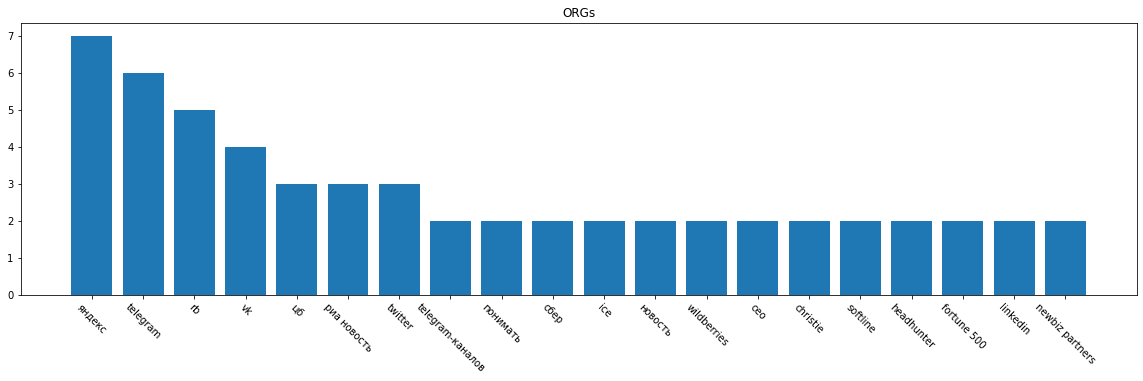

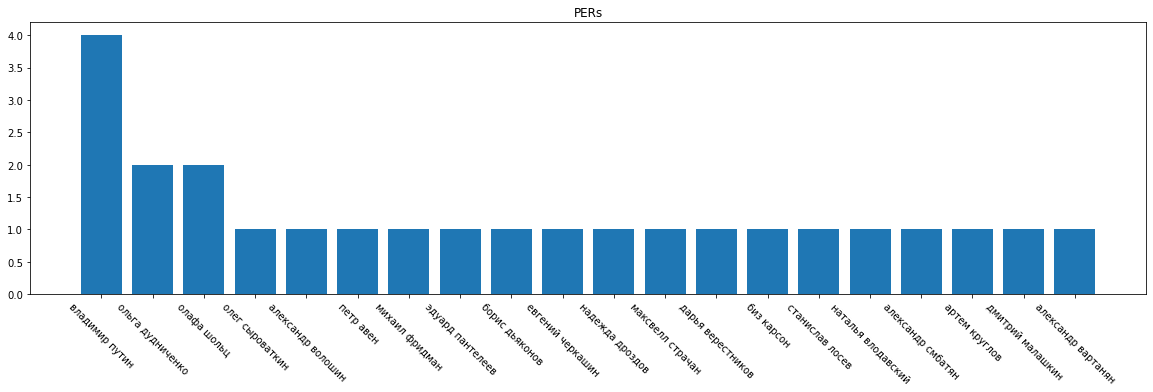

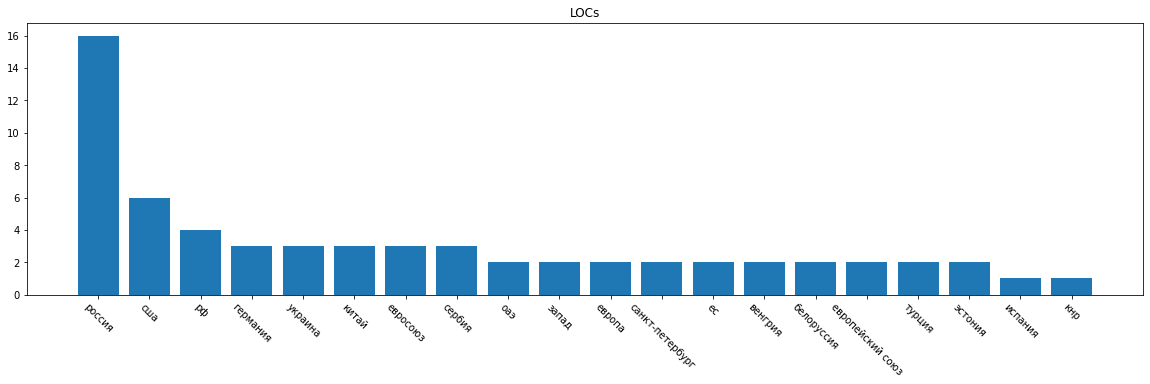

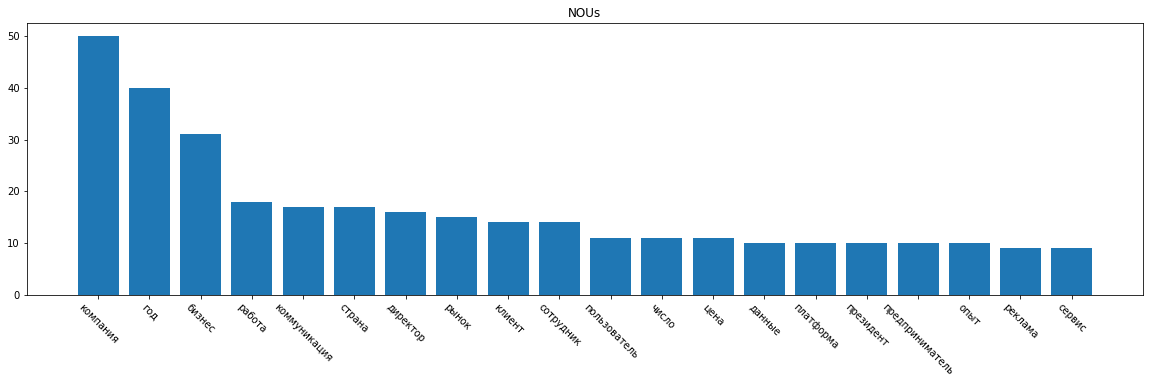

In [227]:
# plot trends for gen
print("info: GetTrends start...")
trends_gen = get_trends_by_tag(news, gen_tags, ner, lemmatizer)
plot_trends(trends_gen)

info: GetTrends start...


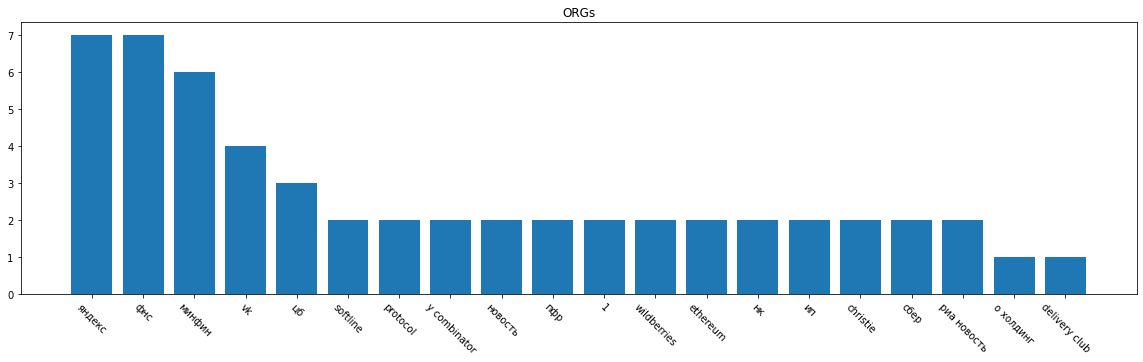

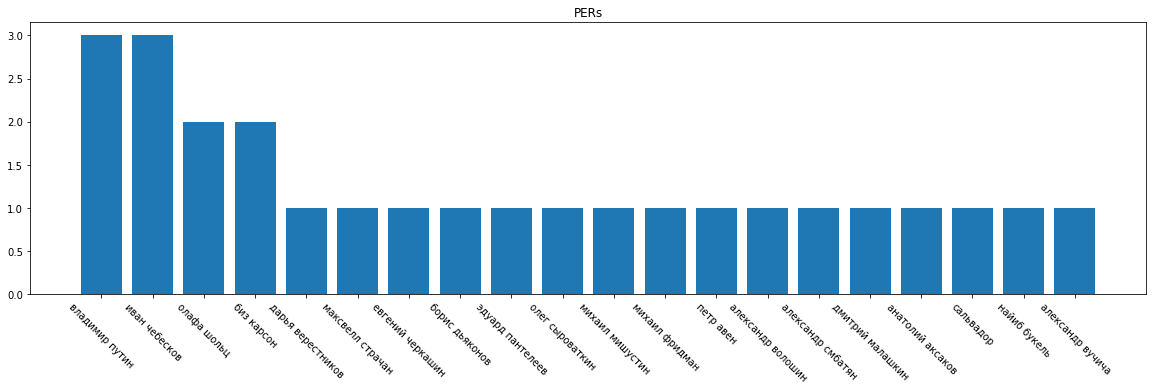

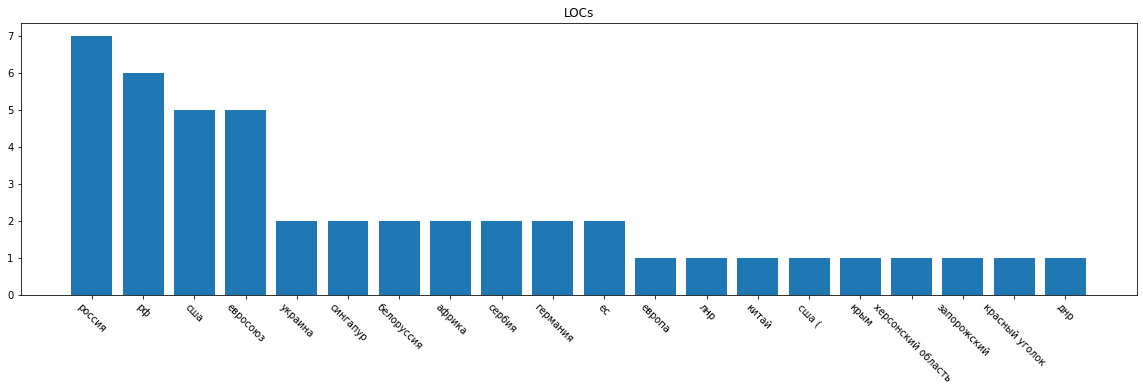

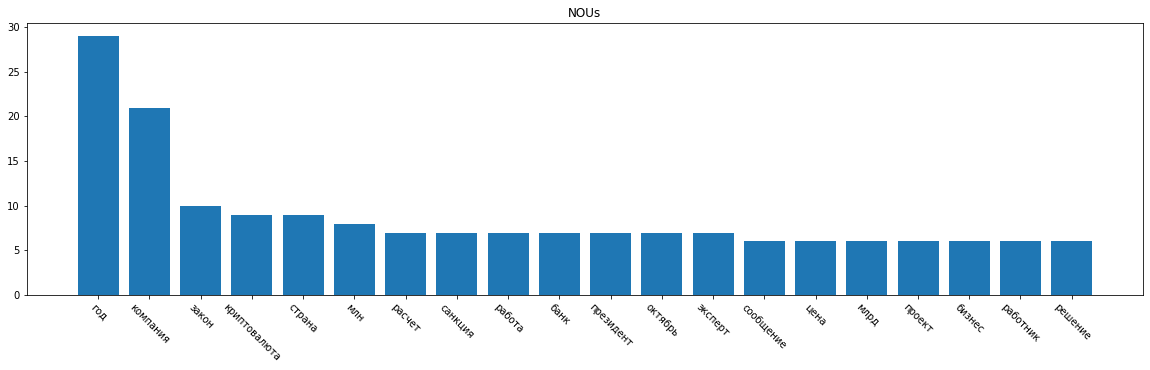

In [228]:
# plot trends for buh
print("info: GetTrends start...")
trends_buh = get_trends_by_tag(news, buh_tags, ner, lemmatizer)
plot_trends(trends_buh)